In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
insuranceDF = pd.read_csv('SBI_Life_insurance.csv')
print(insuranceDF.head())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


In [4]:
insuranceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

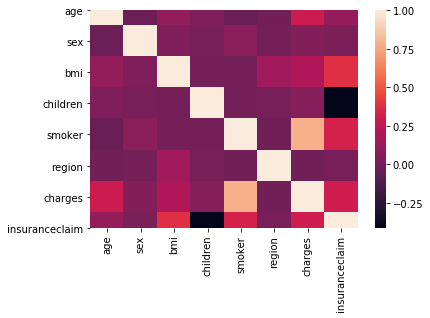

In [6]:
corr = insuranceDF.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [7]:
dfTrain = insuranceDF[:1000]
dfTest = insuranceDF[1000:1300]
dfCheck = insuranceDF[1300:]

In [8]:
trainLabel = np.asarray(dfTrain['insuranceclaim'])
trainData = np.asarray(dfTrain.drop('insuranceclaim',1))
testLabel = np.asarray(dfTest['insuranceclaim'])
testData = np.asarray(dfTest.drop('insuranceclaim',1))

In [9]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
 
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [10]:
insuranceCheck = LogisticRegression()
insuranceCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
accuracy = insuranceCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  85.66666666666667 %


Text(0.5, 0, 'Importance')

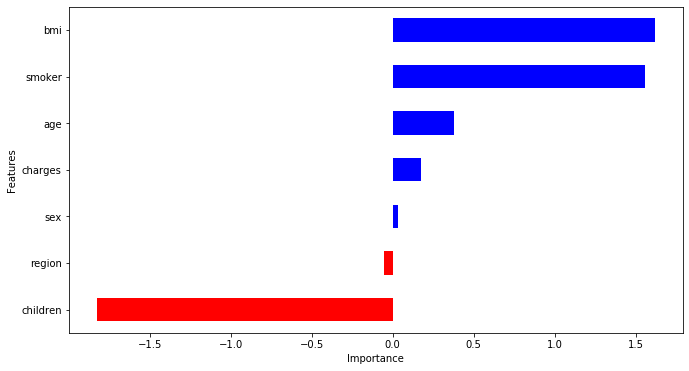

In [12]:
coeff = list(insuranceCheck.coef_[0])
labels = list(dfTrain.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [14]:
from sklearn.externals import joblib
joblib.dump([insuranceCheck, means, stds], 'insurance01Model.pkl')

['insurance01Model.pkl']

In [15]:
insuranceLoadedModel, means, stds = joblib.load('insurance01Model.pkl')
accuracyModel = insuranceLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  85.66666666666667 %


In [16]:
print(dfCheck.head(38))

      age  sex     bmi  children  smoker  region      charges  insuranceclaim
1300   45    1  30.360         0       1       2  62592.87309               1
1301   62    1  30.875         3       1       1  46718.16325               1
1302   25    0  20.800         1       0       3   3208.78700               0
1303   43    1  27.800         0       1       3  37829.72420               1
1304   42    1  24.605         2       1       0  21259.37795               1
1305   24    0  27.720         0       0       2   2464.61880               1
1306   29    0  21.850         0       1       0  16115.30450               1
1307   32    1  28.120         4       1       1  21472.47880               0
1308   25    0  30.200         0       1       3  33900.65300               1
1309   41    1  32.200         2       0       3   6875.96100               0
1310   42    1  26.315         1       0       1   6940.90985               0
1311   33    0  26.695         0       0       1   4571.41305   

In [18]:
sampleData = dfCheck[2:3]
sampleDataFeatures = np.asarray(sampleData.drop('insuranceclaim',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds

In [20]:
# predict 
predictionProbability = insuranceLoadedModel.predict_proba(sampleDataFeatures)
prediction = insuranceLoadedModel.predict(sampleDataFeatures)
print('Insurance Claim Probability:', predictionProbability)
print('Insurance Claim Prediction:', prediction)

Insurance Claim Probability: [[0.95819476 0.04180524]]
Insurance Claim Prediction: [0]
